In [1]:
from src.select_pressure_zone import *
import os

# Read data

In [2]:
pressure_zone_path = '../data/EBMUD-DATA/ebmud_pressure_zones.geojson'
pressure_zones = gpd.read_file(pressure_zone_path)

In [3]:
node_data = pd.read_csv('../data/processed_data/node_information.csv')
pipe_path = '../data/processed_data/EBMUD_pipe_network.json'
pipe_data = gpd.read_file(pipe_path)

In [4]:
node_data = gpd.GeoDataFrame(
    node_data, geometry=gpd.points_from_xy(node_data.longitude, node_data.latitude))

# Select pipes from the chosen pressure zones

In [5]:
pressure_zone_code = [7, 67, 136, 167, 173, 175, 176, 180, 190, 229, 199, 202]
pz_name = "central"
pressure_zone = select_pressure_zone(pressure_zones,pressure_zone_code)

/home/rewu/anaconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [6]:
# get pipes 
pz_pipe_mask = pipe_data.intersects(pressure_zone.loc[1, 'geometry'])
pz_pipes = pipe_data[pz_pipe_mask]


In [7]:
pz_pipes.head()

,OBJECTID,ENABLED,FACILITYID,INSTALLDATE,STATUSCHANGEDATE,LIFECYCLESTATUS,WATERTYPE,MATERIALTYPE,MGE_MSLINK,LININGMATERIALTYPE,...,DISTANCETORW,VERTEXCOUNT,GEOGRAPHIC_FIDELITY,ISHIGHPRESSURE,ISRESTRAINEDJOINT,PRESPLIT_FACID,GLOBALID,SHAPE_Length,pipe_id,geometry
29632,428201,1.0,1987379,None,2013-06-20T00:00:00,AB,Potable,S,NaN,M,...,None,6.0,Unknown,None,NaN,NaN,{A1495702-E2EE-4B89-BC3C-20B1EA63CEBD},6.412698,29632,"MULTILINESTRING ((-122.29060 37.84111, -122.29..."
29633,428202,1.0,45011,None,1937-09-17T00:00:00,AB,Potable,C,2531630.0,U,...,None,12.0,Unknown,None,NaN,NaN,{2FCAE063-FE54-4FB2-8D84-1461B3B65AF3},36.825647,29633,"MULTILINESTRING ((-122.22740 37.78741, -122.22..."
29634,428203,1.0,2054719,2017-11-22T00:00:00,None,AC,Potable,S,NaN,M,...,None,NaN,Unknown,None,NaN,NaN,{744F55EB-02B6-481F-B085-91337998750F},9.600021,29634,"MULTILINESTRING ((-122.29932 37.80642, -122.29..."
29635,428204,1.0,2113429,None,1937-09-17T00:00:00,AB,Potable,C,NaN,U,...,None,15.0,Unknown,None,NaN,45014.0,{9185BC16-B46F-45AC-87DF-83570C3BB200},6.634154,29635,"MULTILINESTRING ((-122.22825 37.78663, -122.22..."
29636,428205,1.0,2054606,2017-11-22T00:00:00,None,AC,Potable,S,NaN,M,...,None,NaN,Unknown,None,NaN,2054606.0,{CE51A95B-EAE1-4129-80AC-2B4B2CB2F6B3},3.424317,29636,"MULTILINESTRING ((-122.30236 37.80711, -122.30..."


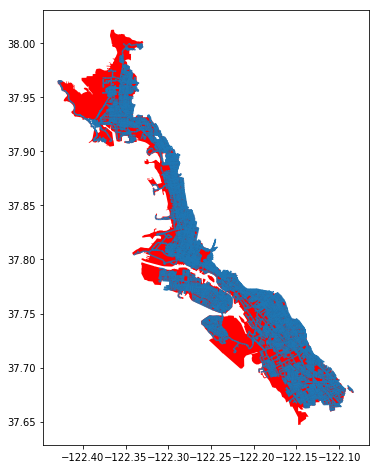

In [8]:
plot_geometries(pressure_zone['geometry'],pz_pipes['geometry'])

In [9]:
pipe_data_csv = pd.read_csv('../data/processed_data/pipe_information.csv')
pz_pipes = pz_pipes.merge(pipe_data_csv,how='inner',on=['pipe_id'])

In [10]:
print (len(pz_pipes))
pz_pipes.head()

66746


,OBJECTID,ENABLED,FACILITYID,INSTALLDATE,STATUSCHANGEDATE,LIFECYCLESTATUS,WATERTYPE,MATERIALTYPE,MGE_MSLINK,LININGMATERIALTYPE,...,SHAPE_Length,pipe_id,geometry,node1,node2,length,material,diameter,age,C
0,428201,1.0,1987379,None,2013-06-20T00:00:00,AB,Potable,S,NaN,M,...,6.412698,29632,"MULTILINESTRING ((-122.29060 37.84111, -122.29...",28975,28976,6.412698,S,12.0,27.0,130
1,428202,1.0,45011,None,1937-09-17T00:00:00,AB,Potable,C,2531630.0,U,...,36.825647,29633,"MULTILINESTRING ((-122.22740 37.78741, -122.22...",28977,28978,36.825647,C,6.0,75.0,100
2,428203,1.0,2054719,2017-11-22T00:00:00,None,AC,Potable,S,NaN,M,...,9.600021,29634,"MULTILINESTRING ((-122.29932 37.80642, -122.29...",28979,28980,9.600021,S,4.0,3.0,130
3,428204,1.0,2113429,None,1937-09-17T00:00:00,AB,Potable,C,NaN,U,...,6.634154,29635,"MULTILINESTRING ((-122.22825 37.78663, -122.22...",28981,28982,6.634154,C,6.0,75.0,100
4,428205,1.0,2054606,2017-11-22T00:00:00,None,AC,Potable,S,NaN,M,...,3.424317,29636,"MULTILINESTRING ((-122.30236 37.80711, -122.30...",28983,28984,3.424317,S,8.0,3.0,130


In [12]:
valid_column = [ 'pipe_id', 'geometry', 'node1', 'node2', 'length','material', 'diameter', 'age','C']
pz_pipes_clean = pz_pipes[valid_column]

In [13]:
save_folder = "../data/processed_data/"+pz_name+"/"
if not os.path.exists(save_folder):
    print ("save folder does not exist, create a new one")
    os.mkdir(save_folder)



save folder does not exist, create a new one


In [14]:
save_path = save_folder+"pipes.geojson"
pz_pipes_clean.to_file(save_path, driver="GeoJSON")
print ("Pipe info saved to: ",save_path)

Pipe info saved to:  ../data/processed_data/central/pipes.geojson


# Select nodes from the chosen pressure zones

In [20]:
# nodes for pz
pz_node_mask = node_data['node_id'].isin(valid_node_ids) 
pz_nodes = node_data[pz_node_mask]
unary_union = pz_nodes['geometry'].unary_union

In [21]:
pz_nodes.to_file(save_folder+"nodes.geojson", driver="GeoJSON")

## Remove isolated pipes

In [15]:
# again, central_isopipes.json is generated from the abandoned project, cityscape. 
# You can generate by yourself by running hydraulic simulation on the whole network
# and find the pipes with no flow
iso_pipe_info = gpd.read_file('../data/EBMUD-DATA/central_isopipes.json')

In [26]:
iso_pipe_ids = list(iso_pipe_info['pipe_id'])
iso_pipe_ids = [int(pid.split('-')[1]) for pid in iso_pipe_ids]


In [28]:
print (len(pz_pipes_clean))
connected_pipes = pz_pipes_clean[~pz_pipes_clean['pipe_id'].isin(iso_pipe_ids)]
print (len(connected_pipes))

66746
65698


In [29]:
save_path = save_folder+"connected_pipes.geojson"
connected_pipes.to_file(save_path, driver="GeoJSON")
print ("Pipe info (connected only) saved to: ",save_path)

Pipe info (connected only) saved to:  ../data/processed_data/central/connected_pipes.geojson


## Remove isolated nodes

In [30]:
valid_node_ids = set(list(connected_pipes['node1'])+list(connected_pipes['node2']))
node_mask = pz_nodes['node_id'].astype('int').isin(valid_node_ids) 
connected_nodes = pz_nodes[node_mask]

print(len(pz_nodes),len(connected_nodes))

61304 60067


In [31]:
connected_nodes.to_file(save_folder+"connected_nodes.geojson", driver="GeoJSON")